# Outlier Handling in Data

What's an outlier ??
  - extreme values
  - anamolies (sometimes)
  

Why it is imp?

Genuine vs Bad Outliers

How to find outliers in single feature in Structured Data?

How to tackle outliers in single feature in Structured Data?

How to find and remove Outliers in multi-feature environment in Structured Data?

How to detect and treat outliers in Time Series data?


# Why Outlier detection is IMP?

It affects stats of data. (like mean, std dev, etc)

Features of data detected by a machine learning algorithm might not reflect the real data



In [1]:
import numpy as np

In [2]:
sample = np.array([10,25,3,5,6,19,21,23,15])
np.mean(sample), np.std(sample)

(14.11111111111111, 7.880276989554286)

In [3]:
sample = np.array([10,25,3,5,6,19,21,23,15,100,200])
np.mean(sample), np.std(sample)

(38.81818181818182, 57.02920811752866)

In [ ]:
sample = np.array([65,54,56,78,80,55,66,70])
print(np.mean(sample), np.std(sample))
sample = np.array([65,54,56,78,80,55,66,70,1,2])
print(np.mean(sample), np.std(sample))

65.5 9.486832980505138
52.7 26.9705394829247


# Genuine vs Bad Outliers

### Genuine outliers

There can be genuine outliers

Ex. in salaries of employees CEO salary will be exceptionally different

### Bad Outliers 

Outliers due to errors / wrong data / due to fraud

## Conclusion :: we don't ALWAYS REMOVE outliers

# How to find outliers in single feature?

## Manual
Using visual inspection of Box plots

## Can be Automated
Using Inter Quartile Range (IQR) to automate the detection

Using Z-score [z = (x - mu) / sigma] (abs zscore <= 3)

In [11]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("house_price_prediction.csv")

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [42]:
df.drop(['id', 'date','lat', 'long','yr_renovated'], axis=1, inplace=True)

In [16]:
df.shape

(17210, 14)

In [43]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

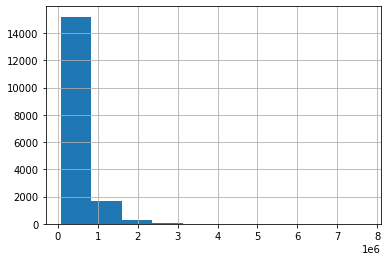

In [24]:
df['price'].hist()

In [18]:
df['price'].describe()

count    1.721000e+04
mean     5.391069e+05
std      3.674218e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

# Log transform 

the data with very high variations should be log transformed

## Specially it is applied on target variables

In [27]:
df['price'] = np.log(df['price'])

In [28]:
df['price'].describe()

count    17210.000000
mean        13.044580
std          0.528797
min         11.264464
25%         12.676076
50%         13.017003
75%         13.369223
max         15.856731
Name: price, dtype: float64

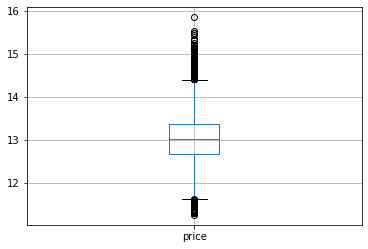

In [29]:
df[['price']].boxplot() # NEVER remove / impute outlier in target column

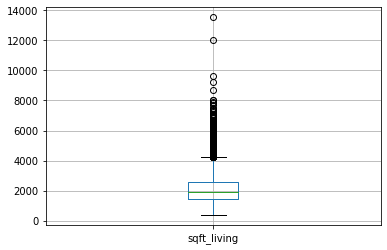

In [30]:
df[['sqft_living']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08f1ce6510>]],
      dtype=object)

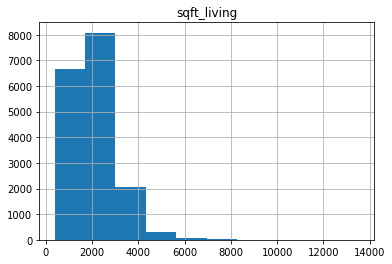

In [31]:
df[['sqft_living']].hist()

In [32]:
df['sqft_lot'].describe()

count    1.721000e+04
mean     1.513545e+04
std      4.260361e+04
min      5.200000e+02
25%      5.034000e+03
50%      7.620000e+03
75%      1.070075e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [33]:
df['sqft_lot']= np.log(df['sqft_lot'])

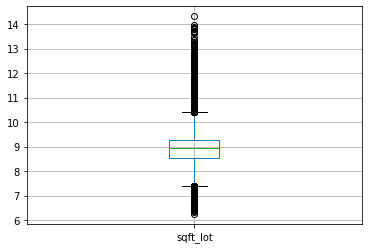

In [34]:
df[['sqft_lot']].boxplot()

In [45]:
df['sqft_lot15']= np.log(df['sqft_lot15'])

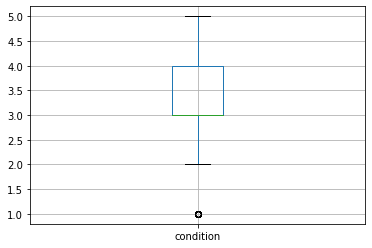

In [35]:
df[['condition']].boxplot()

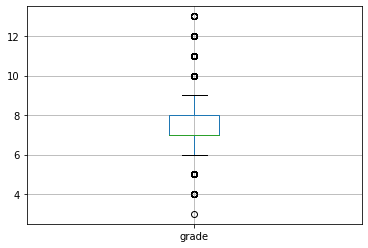

In [36]:
df[['grade']].boxplot()

In [40]:
import matplotlib.pyplot as plt

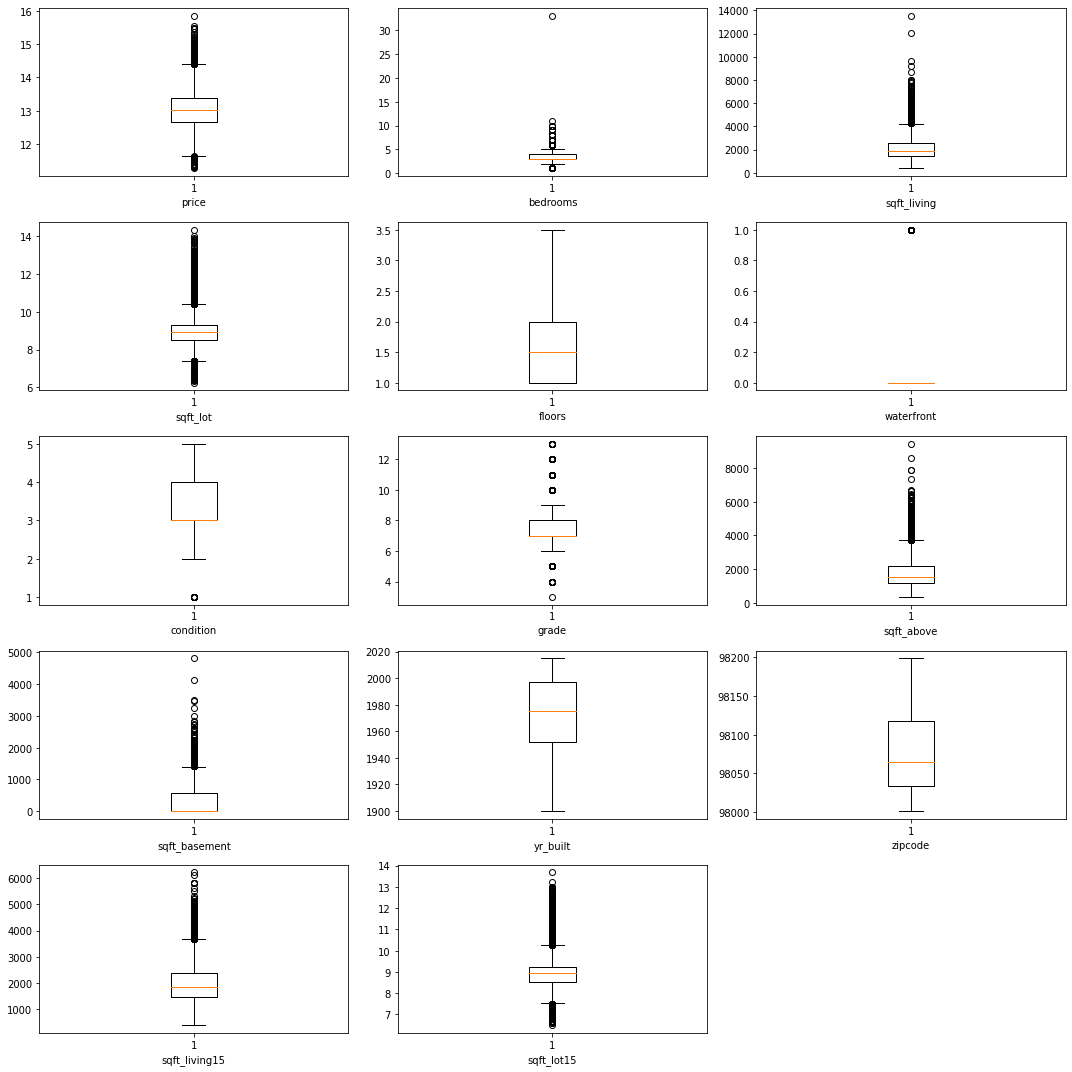

In [46]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(df.columns,1):
    plt.subplot(5,3, i)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.tight_layout()

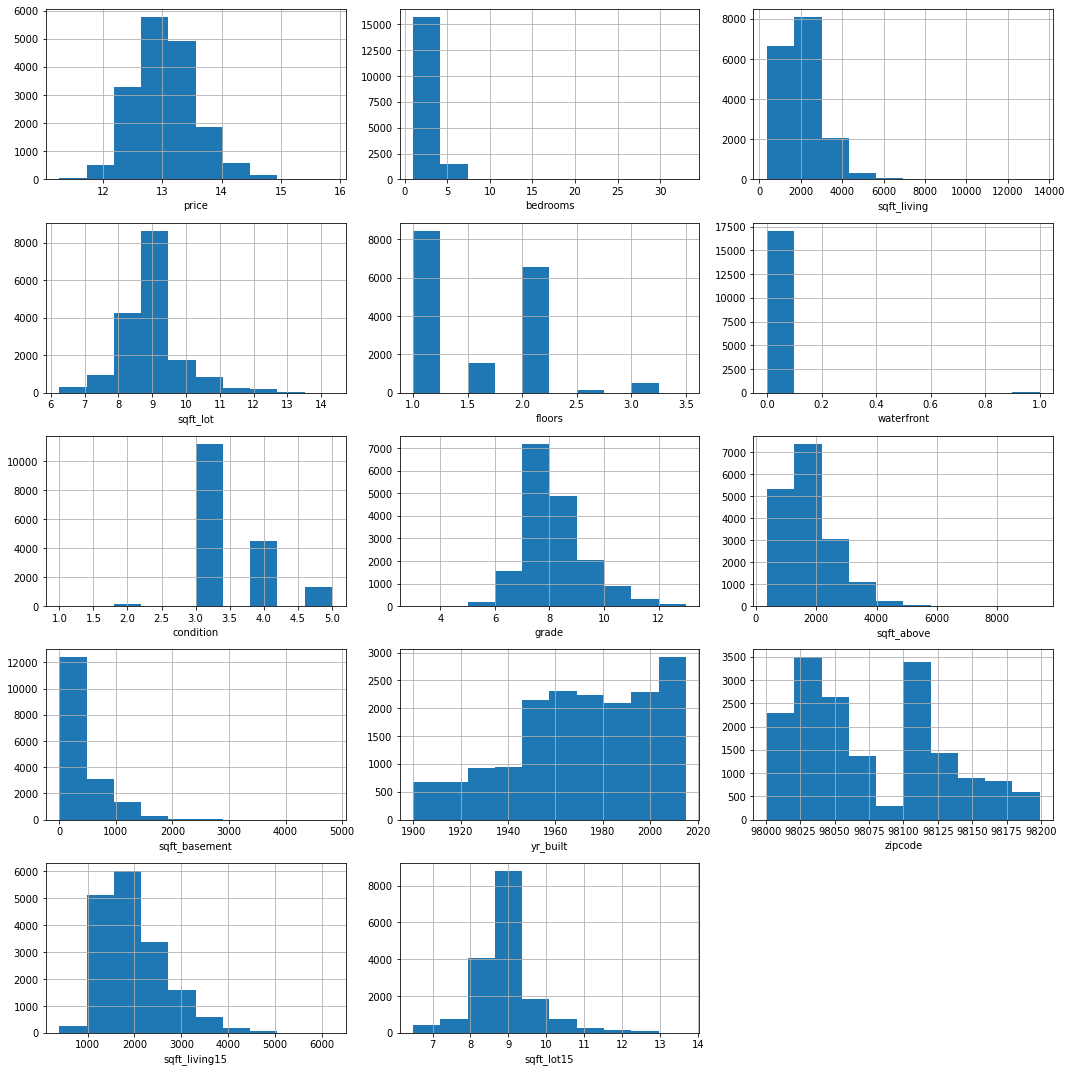

In [47]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(df.columns,1):
    plt.subplot(5,3, i)
    df[col].hist()
    plt.xlabel(col)
plt.tight_layout()

# IQR for getting valid limits

In [48]:
# For condition column remove outliers
# Find Q1 and Q3 and IQR= Q3-Q1 
# min_val = Q1 - 1.5 * IQR
# max_val = Q3 + 1.5 * IQR

def calc_limits_IQR(df, column):
    q1,q3 = df[column].quantile([0.25,0.75])
    iqr = q3 - q1
    min_val = q1 - (1.5 * iqr)
    max_val = q3 + (1.5 * iqr)
    return min_val, max_val

# Impute Outliers

Substitute values of outliers with min / max valid values



1. select one column

2. for that find min and max valid value

3. if for one row value in column > max value then replace value in that row with max value 

Hint :: Use loc

In [49]:
# Separate Input features X and Class variable Y
X = df.loc[:, ~df.columns.isin(['price'])]
Y = df.loc[:,'price']

In [ ]:
Y = df.loc[:,'price']
X = df.drop(['price'],axis=1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=7)

## IMPUTE outliers of ONLY training data

In [53]:
#output df_impute

def impute_outliers(X_train,Y_train):
    for col in X_train.columns:
        min_l, max_l = calc_limits_IQR(X_train,col)
        X_train.loc[X_train[col] > max_l, col] = max_l
        X_train.loc[X_train[col] < min_l, col] = min_l
    return X_train,Y_train

In [54]:
X_train.describe() 

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000
mean,3.375223,2078.340900,8.979911,1.500814,0.008213,3.412722,7.657628,1785.846053,292.494848,1971.317890,98077.793213,1985.921670,8.953329
std,0.936699,922.798376,0.897201,0.543636,0.090254,0.650456,1.165855,824.070485,445.464865,29.444951,53.621589,682.761228,0.811102
min,1.000000,380.000000,6.411818,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,98001.000000,399.000000,6.490724
25%,3.000000,1420.000000,8.522579,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,98033.000000,1490.000000,8.536996
50%,3.000000,1910.000000,8.938532,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,8.937875
75%,4.000000,2550.000000,9.273315,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,2360.000000,9.218309
max,33.000000,13540.000000,14.317109,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,5790.000000,13.677627


In [55]:
X_train_impute,Y_train_impute = impute_outliers(X_train.copy(),Y_train.copy())

In [56]:
X_train_impute.describe()

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,12907.000000,12907.000000,12907.000000,12907.000000,12907.0,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000
mean,3.365228,2056.197877,8.938984,1.500814,0.0,3.413303,7.599558,1767.740064,284.549004,1971.317890,98077.793213,1974.561091,8.916369
std,0.849121,841.790926,0.711776,0.543636,0.0,0.648520,0.994019,763.098987,417.551078,29.444951,53.621589,646.746612,0.633238
min,1.500000,380.000000,7.396474,1.000000,0.0,1.500000,5.500000,380.000000,0.000000,1900.000000,98001.000000,399.000000,7.515027
25%,3.000000,1420.000000,8.522579,1.000000,0.0,3.000000,7.000000,1190.000000,0.000000,1952.000000,98033.000000,1490.000000,8.536996
50%,3.000000,1910.000000,8.938532,1.500000,0.0,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,8.937875
75%,4.000000,2550.000000,9.273315,2.000000,0.0,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,2360.000000,9.218309
max,5.500000,4245.000000,10.399420,3.500000,0.0,5.000000,9.500000,3740.000000,1400.000000,2015.000000,98199.000000,3665.000000,10.240278


In [ ]:
id(X_train),id(X_train_impute)

(1452752685192, 1452753028744)

# Remove Outliers

Remove the rows which have outlier values for a particular feature

### NOTE :: Do not remove more than 2-3% ( max 5%) rows or samples.

In [58]:
#output df_removal

def remove_outliers(X_train,Y_train):
    print("Initial shape= ", X_train.shape)
    
    for col in X_train.columns:
        min_l, max_l = calc_limits_IQR(X_train,col)
        idx = X_train.index[((X_train[col] <= max_l) & (X_train[col] >= min_l))]
        X_train =  X_train.loc[idx]
        Y_train = Y_train.loc[idx]
        print("After col=",col," shape is ", X_train.shape)
    return X_train,Y_train

In [59]:
X_train_remove,Y_train_remove = remove_outliers(X_train.copy(),Y_train.copy())

Initial shape=  (12907, 13)
After col= bedrooms  shape is  (12607, 13)
After col= sqft_living  shape is  (12277, 13)
After col= sqft_lot  shape is  (10818, 13)
After col= floors  shape is  (10818, 13)
After col= waterfront  shape is  (10756, 13)
After col= condition  shape is  (10745, 13)
After col= grade  shape is  (10111, 13)
After col= sqft_above  shape is  (9920, 13)
After col= sqft_basement  shape is  (9806, 13)
After col= yr_built  shape is  (9806, 13)
After col= zipcode  shape is  (9806, 13)
After col= sqft_living15  shape is  (9723, 13)
After col= sqft_lot15  shape is  (9435, 13)


In [60]:
X_train_remove.describe()

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.0,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,3.317965,1867.919343,8.867415,1.391839,0.0,3.457764,7.375517,1604.887546,263.031797,1967.009009,98079.426391,1843.735347,8.855709
std,0.769083,620.758606,0.463542,0.476485,0.0,0.663721,0.810451,578.507079,380.934921,28.660352,55.129119,499.364125,0.408410
min,2.000000,560.000000,7.427739,1.000000,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,460.000000,7.653495
25%,3.000000,1400.000000,8.536996,1.000000,0.0,3.000000,7.000000,1160.000000,0.000000,1949.000000,98033.000000,1470.000000,8.546752
50%,3.000000,1820.000000,8.900140,1.000000,0.0,3.000000,7.000000,1470.000000,0.000000,1968.000000,98065.000000,1780.000000,8.910316
75%,4.000000,2290.000000,9.164349,2.000000,0.0,4.000000,8.000000,1960.000000,540.000000,1990.000000,98118.000000,2170.000000,9.120689
max,5.000000,4170.000000,10.324826,3.000000,0.0,5.000000,9.000000,3250.000000,1400.000000,2015.000000,98199.000000,3270.000000,10.016816


# Z score for Removing outliers

In [61]:
X_train.describe()

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000,12907.000000
mean,3.375223,2078.340900,8.979911,1.500814,0.008213,3.412722,7.657628,1785.846053,292.494848,1971.317890,98077.793213,1985.921670,8.953329
std,0.936699,922.798376,0.897201,0.543636,0.090254,0.650456,1.165855,824.070485,445.464865,29.444951,53.621589,682.761228,0.811102
min,1.000000,380.000000,6.411818,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,98001.000000,399.000000,6.490724
25%,3.000000,1420.000000,8.522579,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,98033.000000,1490.000000,8.536996
50%,3.000000,1910.000000,8.938532,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,8.937875
75%,4.000000,2550.000000,9.273315,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,2360.000000,9.218309
max,33.000000,13540.000000,14.317109,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,5790.000000,13.677627


In [62]:
from scipy import stats
def remove_outliers_zscore(X_train,Y_train):
    for col in X_train.columns:
        # print("Before removing col=",col," shape is ", X_train.shape)
        idx = X_train.index[abs(stats.zscore(X_train[col])) <= 3]
        X_train =  X_train.loc[idx]
        Y_train = Y_train.loc[idx]
        print("After col=",col," shape is ", X_train.shape)
    return X_train,Y_train

In [63]:
X_train_z, Y_train_z = remove_outliers_zscore(X_train.copy(),Y_train.copy())

After col= bedrooms  shape is  (12871, 13)
After col= sqft_living  shape is  (12720, 13)
After col= sqft_lot  shape is  (12514, 13)
After col= floors  shape is  (12510, 13)
After col= waterfront  shape is  (12420, 13)
After col= condition  shape is  (12406, 13)
After col= grade  shape is  (12212, 13)
After col= sqft_above  shape is  (12101, 13)
After col= sqft_basement  shape is  (11981, 13)
After col= yr_built  shape is  (11981, 13)
After col= zipcode  shape is  (11981, 13)
After col= sqft_living15  shape is  (11903, 13)
After col= sqft_lot15  shape is  (11778, 13)


In [64]:
X_train_z.describe()

,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,11778.000000,11778.000000,11778.000000,11778.000000,11778.0,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000
mean,3.323569,1939.282136,8.859664,1.484250,0.0,3.419002,7.519868,1676.510528,262.771608,1970.408049,98079.654186,1898.032264,8.846228
std,0.846245,719.572166,0.733317,0.542483,0.0,0.646952,0.980053,674.033113,388.638903,29.485424,53.982303,575.149685,0.658676
min,1.000000,380.000000,6.458338,1.000000,0.0,2.000000,5.000000,380.000000,0.000000,1900.000000,98001.000000,460.000000,6.786717
25%,3.000000,1390.000000,8.517193,1.000000,0.0,3.000000,7.000000,1170.000000,0.000000,1951.000000,98033.000000,1461.500000,8.517193
50%,3.000000,1840.000000,8.900004,1.000000,0.0,3.000000,7.000000,1500.000000,0.000000,1974.000000,98072.000000,1790.000000,8.909235
75%,4.000000,2400.000000,9.199785,2.000000,0.0,4.000000,8.000000,2070.000000,520.000000,1996.000000,98118.000000,2260.000000,9.169518
max,6.000000,4750.000000,11.614055,3.000000,0.0,5.000000,10.000000,3860.000000,1525.000000,2015.000000,98199.000000,3715.000000,11.003965


# Multi Variate Outlier Handling

#### Unsupervised Methods
1. sklearn.ensemble.IsolationForest 
2. sklearn.neighbors.LocalOutlierFactor 
3. DBScan


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
labels = IsolationForest(n_estimators=50, random_state=7).fit_predict(X_train)

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 1919, 1: 15291}

In [ ]:
labels = IsolationForest(n_estimators=150, random_state=7).fit_predict(X_train)

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 1756, 1: 15454}

# Apply linear regression on all variants of the data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
rmse=sqrt(mean_squared_error(Y_test.values,Y_pred))
print(rmse)

0.3130119784702681


In [ ]:
reg = LinearRegression().fit(X_train_impute,Y_train_impute)
Y_pred_impute = reg.predict(X_test)
rmse=sqrt(mean_squared_error(Y_test.values,Y_pred_impute))
print(rmse)

0.34394712337532996


In [ ]:
reg = LinearRegression().fit(X_train_remove, Y_train_remove)
Y_pred_remove = reg.predict(X_test)
rmse=sqrt(mean_squared_error(Y_test.values,Y_pred_remove))
print(rmse)

0.4212657565153671


In [ ]:
reg = LinearRegression().fit(X_train_z, Y_train_z)
Y_pred_z = reg.predict(X_test)
rmse=sqrt(mean_squared_error(Y_test.values,Y_pred))
print(rmse)

0.3130119784702681


In [ ]:
res = pd.DataFrame([Y_test.values,Y_pred,Y_pred_impute,Y_pred_remove,Y_pred_z])
res = res.T
res.columns = ['Y_test','Y_pred','Y_impute_pred','Y_remove_pred','Y_z_pred']

In [ ]:
res.describe()

,Y_test,Y_pred,Y_impute_pred,Y_remove_pred,Y_z_pred
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,13.046477,13.047158,13.092335,12.985754,13.054993
std,0.530592,0.425610,0.502346,0.514584,0.451270
min,11.314475,11.865249,11.760039,9.307272,11.716833
25%,12.676076,12.747579,12.740730,12.695914,12.739476
50%,13.022543,12.977651,13.002977,12.945066,12.977387
75%,13.377393,13.256472,13.336159,13.242739,13.276394
max,15.492607,15.439426,16.047006,15.649921,15.688872


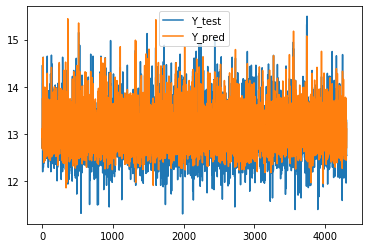

In [ ]:
res[['Y_test','Y_pred']].plot()

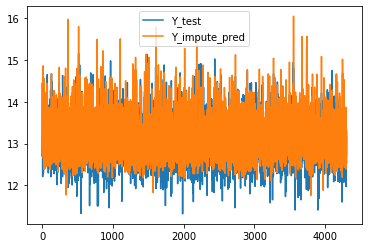

In [ ]:
res[['Y_test','Y_impute_pred']].plot()

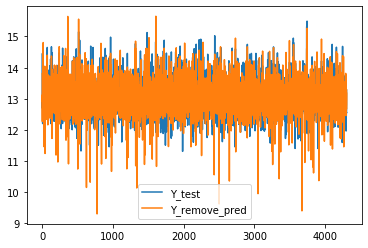

In [ ]:
res[['Y_test','Y_remove_pred']].plot()

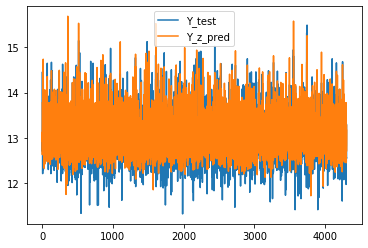

In [ ]:
res[['Y_test','Y_z_pred']].plot()

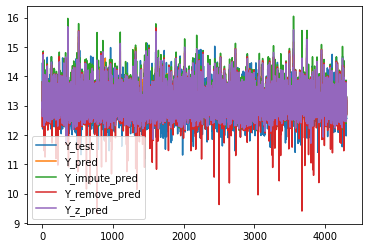

In [ ]:
res.plot()

# Outliers in Time Series

Difficult problem

Unique handling (No standardization)

Methods
1. Based on quantiles
2. Median Absolute Deviation
3. ARIMA or Prophet Fit , etc